## Reusable Ice Cream Container: Inputs

#### Reusable
Container weight: 188 g\
CO2 from primary production and processing: 2.95 kg/kg\
CO2 from use related activities: 0.022 kg/cycle\
Embodied energy from primary production and processing: 55.1 MJ/kg\
Energy consumption from use related activities: 0.34 MJ/cycle

#### Single Use Mycelium Composite
Container weight: 170 g\
CO2 from primary production and processing: 0.13 kg/kg\
Embodied energy from primary production and processing: 2.81 MJ/kg

#### Single Use EPS Reference
Container weight: 37 g\
CO2 from primary production and processing: 4.05 kg/kg\
Embodied energy from primary production and processing: 108.80 MJ/kg


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

containerAmountS1 = 3562.0
containerWeight = 0.188

co2Production = 2.95 * containerWeight
co2Use = 0.022

embodiedEnergy = 55.1 * containerWeight
energyUse = 0.34

## Required Behaviour

$$initialDistribution\ =\begin{bmatrix} 1.0 & 0.0 & 0.0 & 0.0 & 0.0\end{bmatrix}$$
<br>


$$transitionProbabilities\ =\begin{bmatrix} 0.0 & 0.96 & 0.00 & 0.04 & 0.0 \\ 0.0 & 0.00 & 0.99 & 0.01 & 0.0 \\ 0.9 & 0.00 & 0.00 & 0.005 & 0.005 \\ 0.0 & 0.00 & 0.00 & 1.00 & 0.0 \\ 0.2 & 0.00 & 0.00 & 0.50 & 0.3\end{bmatrix}$$  

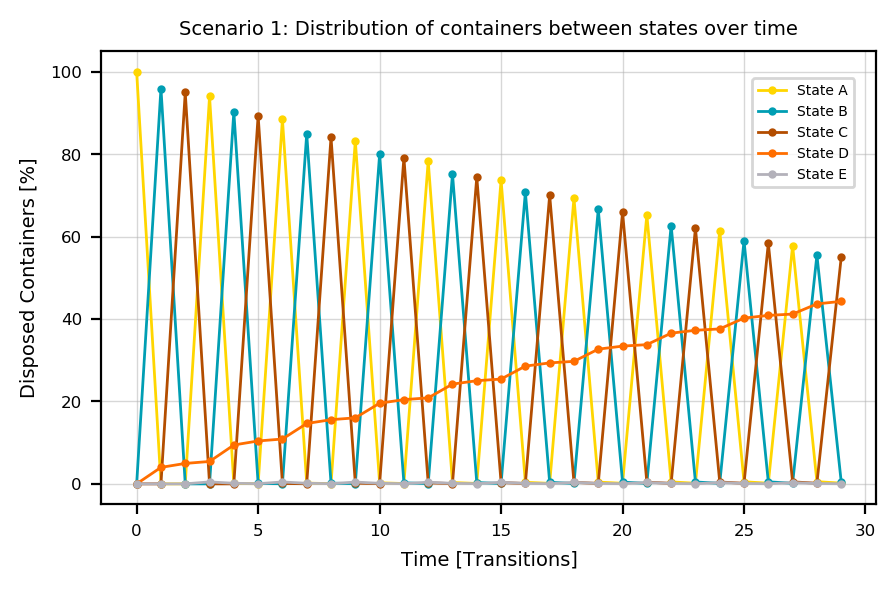

In [6]:
#The initial distribution of container and the propability transition matrix is set
initialDist = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
distHistory = initialDist
transMatrixOne = np.array([[0.0, 0.96, 0.00, 0.04, 0.0], 
                           [0.0, 0.00, 0.99, 0.01, 0.00],
                           [0.99, 0.00, 0.00, 0.005, 0.005],
                           [0.0, 0.00, 0.00, 1.00, 0.00], 
                           [0.2, 0.00, 0.00, 0.50, 0.30]])
currentDist = initialDist

#The initial distribution containers is multiplied with the transistion matrix and upadated 30 times
#The distribution of containers after each cycle is logged
for x in range (1,30):
    currentDist = np.matmul(currentDist,transMatrixOne)
    distHistory = np.vstack([distHistory,currentDist])

#print("Distribution history =")
#print(distHistory)

#The container distribution history is plotted for each state
plt.figure(figsize = (5,3), dpi=200)

x = np.linspace(0.0, 29, 30)
yaSone = distHistory[ : , 0]
ybSone = distHistory[ : , 1]
ycSone = distHistory[ : , 2]
ydSone = distHistory[ : , 3]
yeSone = distHistory[ : , 4]

plt.plot(x, yaSone * 100, label = 'State A', color = '#FFD600', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, ybSone * 100, label = 'State B', color = '#009EB3', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, ycSone * 100, label = 'State C', color = '#B34D00', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, ydSone * 100, label = 'State D', color = '#FF6E00', marker = '.', linewidth = '1', markersize = '4')
plt.plot(x, yeSone * 100, label = 'State E', color = '#B3B1BA', marker = '.', linewidth = '1', markersize = '4')

#Visual plot settings
plt.legend(loc = (0.84, 0.7), fontsize = '5')
plt.title('Scenario 1: Distribution of containers between states over time', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Disposed Containers [%]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

## Analysis: Average number of transitions
This section cumputes the average number of transitions it takes a container to go from any non-absorbing states (State A, B, C, E) to the absorbing state (State D) of being disposed. 

In [21]:
#SCENARIO 1
index1 = np.where(transMatrixOne == 1.0)
stdForm1 = transMatrixOne
stdForm1 = np.roll(stdForm1, - index1[0], axis=1)
stdForm1 = np.roll(stdForm1, - index1[1], axis = 0)
#print('Transition matrix in standard form:')
#print(stdForm)

#The matrix 'q' is found by the row an collumn containing the absorbing state
q1 = stdForm1
q1 = np.delete(q1, 0, axis = 0)
q1 = np.delete(q1, 0, axis = 1)
#print('Matrix q trimmed away from the standard form:')
#print(q)

#A identity matrix of equal shape of 'q' is created
identity1 = np.identity(len(q1[1]))
#print('The identity matrix of corresponding size of q:')
#print(identity)

#The inverse of 'q' minus the identity matrix if calculated in order to find the fundamental matrix
fundamentalOne = np.linalg.inv(np.subtract(identity1, q1))
rowLabels = np.array(['e', 'a', 'b', 'c'])
#print('Fundamental matrix for Scenario 1:')
#print(fundamentalOne)
#print('With rows representing the states:')
print(rowLabels)
avgTrans1 = np.sum(fundamentalOne, axis = 1)

print(avgTrans1)

['e' 'a' 'b' 'c']
[15.86209626 50.51733692 51.58055929 51.09147403]


## Analysis: Disposed Containers Over Time

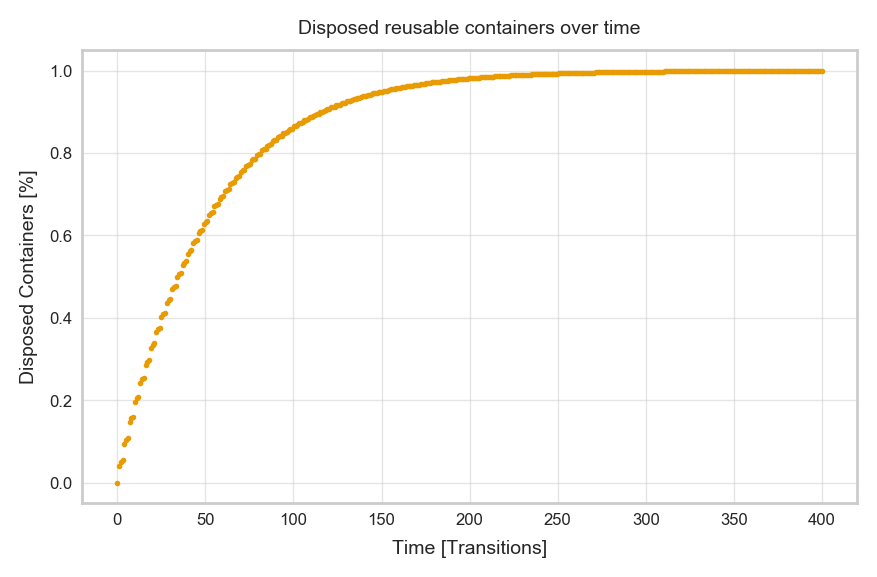

In [22]:
#Generates 1000 transistion matricies by sampling from a uniform distribution
#Iterates over the markov chain for each transition matrix with a nested for-loop
#Logs the distribution history of disposed containers for each transition matrix

simulations = 2
transitions = 400

#SCENARIO 1
initialDistS1 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
disposedIterationsS1 = np.zeros(transitions)

for x in range (1,simulations):
    distHistoryS1 = initialDistS1
    currentDistS1 = initialDistS1
    transMatrixS1 = np.array([[0.0, 0.96, 0.00, 0.04, 0.0], 
                            [0.0, 0.00, 0.99, 0.01, 0.0],
                            [0.99, 0.00, 0.00, 0.005, 0.005],
                            [0.0, 0.00, 0.00, 1.00, 0.0], 
                            [0.2, 0.00, 0.00, 0.50, 0.3]])
    
    for i in range (1,transitions):
        currentDistS1 = np.matmul(currentDistS1, transMatrixS1)
        distHistoryS1 = np.vstack([distHistoryS1, currentDistS1])
    
    disposedIterationsS1 = np.vstack([disposedIterationsS1, distHistoryS1[ : , 3]])


#PLOT
plt.figure(figsize = (5,3), dpi=200)    
plt.style.use('seaborn-whitegrid')    
x = np.linspace(0, transitions, transitions)
for ii in range (1,simulations):   
    yS1 = disposedIterationsS1[ii, : ]
    plt.plot(x, yS1, 'o', color='#E89B02', markersize = '1')    

#Visuals
plt.plot(0, 0, label = 'Scenario 1', color = '#E89B02')    

plt.title('Disposed reusable containers over time', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Disposed Containers [%]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

### Total CO2 Emsission

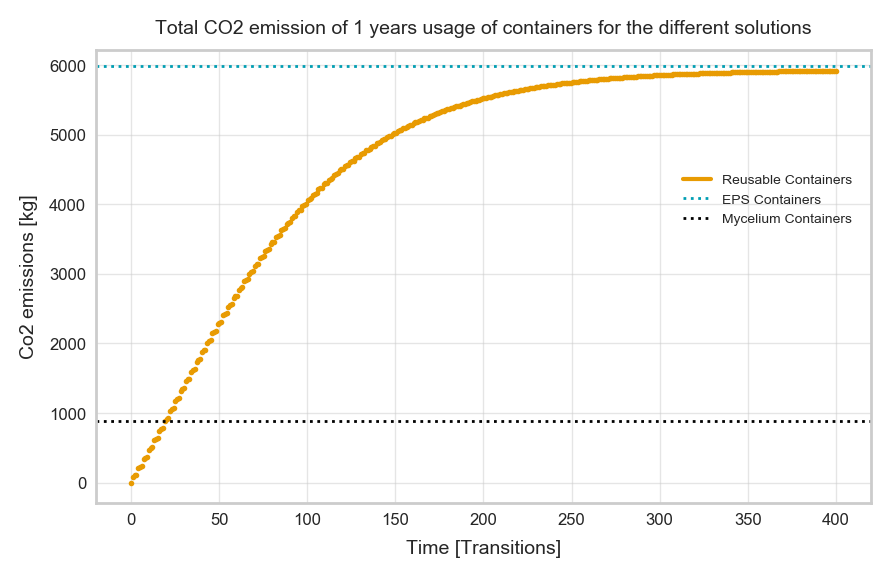

In [11]:
#Total amount of CO2 emissions

plt.figure(figsize = (5,3), dpi=200)    
plt.style.use('seaborn-whitegrid')    
x = np.linspace(0, transitions, transitions)

priorS1 = 0.0
diffS1 = 0.0
sumConsumptionS1 = np.array([0.0])
accumulatedCo2S1 = np.array([0.0])

for i in range (1,simulations):
    accumulatedCo2S1 = np.array([0.0])    
    for j in range (1,transitions):
        priorS1 = disposedIterationsS1.item(i, j - 1)
        diffS1 = disposedIterationsS1.item(i, j) - priorS1
        co2ConsumptionS1 = (co2Production + (co2Use * j)) * (containerAmountS1 * diffS1)
        sumConsumptionS1[0] += co2ConsumptionS1
        accumulatedCo2S1 = np.hstack((accumulatedCo2S1, sumConsumptionS1)) 
    plt.plot(x, accumulatedCo2S1, 'o', color='#E89B02', markersize = '1', alpha = 1)
    sumConsumptionS1.itemset(0, 0)

#PLOT
plt.plot(0, 0, label = 'Reusable Containers', color = '#E89B02')    
plt.axhline(y = 5994, xmin = 0, xmax = 80, label = 'EPS Containers', color = '#009EB3', linewidth = '1', linestyle = ':')
plt.axhline(y = 884, xmin = 0, xmax = 80, label = 'Mycelium Containers', color = 'black', linewidth = '1', linestyle = ':')
    
plt.title('Total CO2 emission of 1 years usage of containers for the different solutions', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Co2 emissions [kg]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.ticklabel_format(axis = 'y', style = 'sci')
plt.legend(loc = (0.75, 0.6), fontsize = '5')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()

### Total Energy Consumption

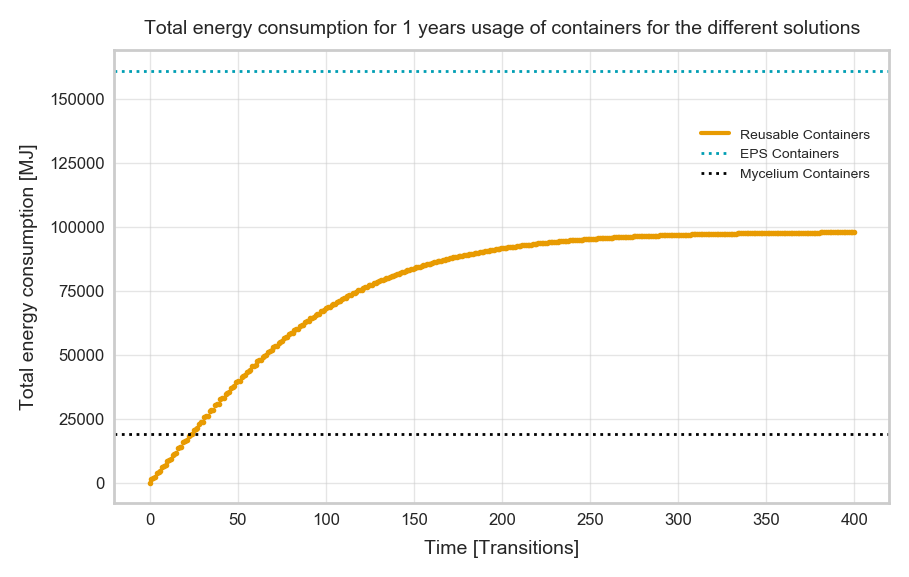

In [10]:
#Total amount of energy consumption

plt.figure(figsize = (5,3), dpi=200)    
plt.style.use('seaborn-whitegrid')    
x = np.linspace(0, transitions, transitions)

priorS1 = 0.0
diffS1 = 0.0
sumConsumptionS1 = np.array([0.0])
accumulatedEnergyS1 = np.array([0.0])

for i in range (1,simulations):
    accumulatedEnergyS1 = np.array([0.0])    
    for j in range (1,transitions):
        priorS1 = disposedIterationsS1.item(i, j - 1)
        diffS1 = disposedIterationsS1.item(i, j) - priorS1
        energyConsumptionS1 = (embodiedEnergy + (energyUse * j)) * (containerAmountS1 * diffS1)
        sumConsumptionS1[0] += energyConsumptionS1
        accumulatedEnergyS1 = np.hstack((accumulatedEnergyS1, sumConsumptionS1)) 
    plt.plot(x, accumulatedEnergyS1, 'o', color='#E89B02', markersize = '1', alpha = 1)
    sumConsumptionS1.itemset(0, 0)

plt.plot(0, 0, label = 'Reusable Containers', color = '#E89B02')    
plt.axhline(y = 161024, xmin = 0, xmax = 80, label = 'EPS Containers', color = '#009EB3', linewidth = '1', linestyle = ':')
plt.axhline(y = 19108, xmin = 0, xmax = 80, label = 'Mycelium Containers', color = 'black', linewidth = '1', linestyle = ':')


plt.title('Total energy consumption for 1 years usage of containers for the different solutions', fontsize = '7')
plt.xlabel('Time [Transitions]', fontsize = '7')
plt.ylabel('Total energy consumption [MJ]', fontsize = '7')
plt.xticks(fontsize = '6')
plt.yticks(fontsize = '6')
plt.legend(loc = (0.75, 0.7), fontsize = '5')
plt.ticklabel_format(axis = 'y', style = 'sci')
plt.grid(zorder = 0, alpha = 0.5, linewidth = 0.5)

plt.show()